In [3]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

In [4]:
TECs_TSA = sc.read('/Users/Yi/Desktop/Aire C311Y/TECs_TSA_score.h5ad')

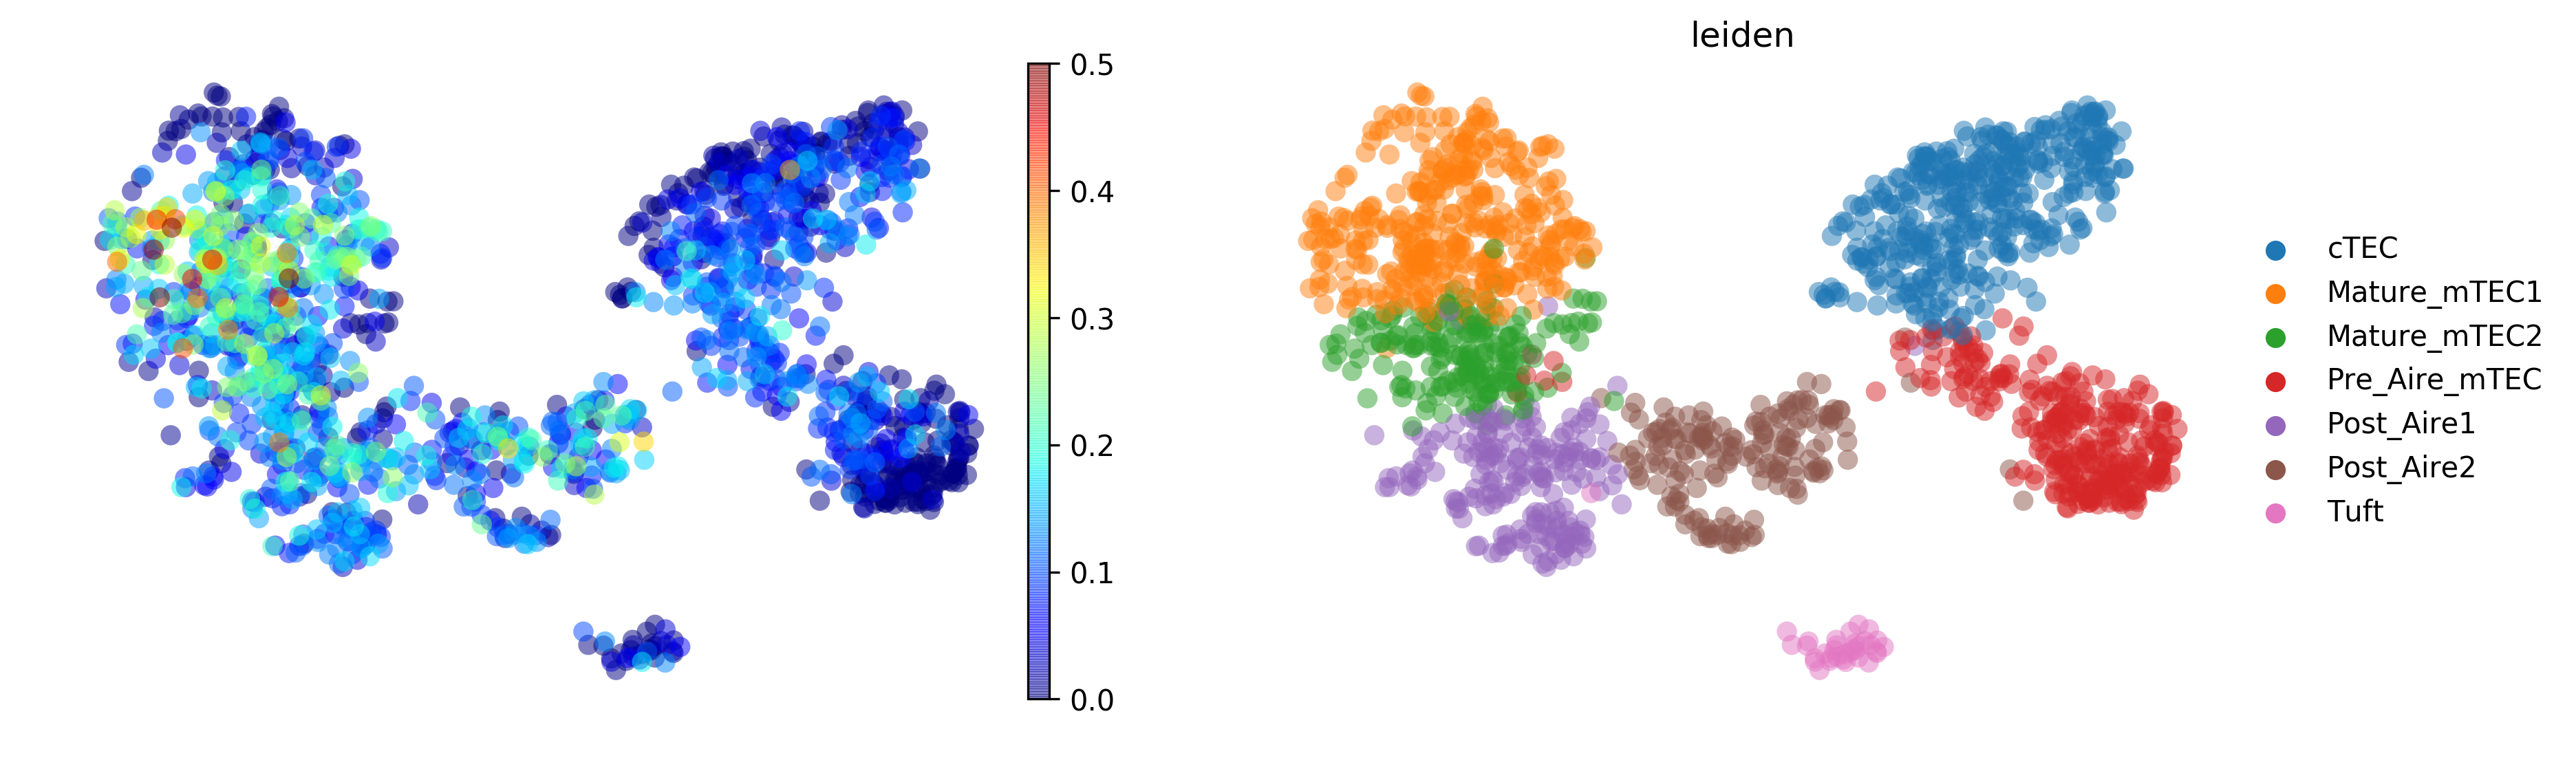

In [5]:
sc.pl.umap(TECs_TSA[TECs_TSA.obs.batch == '0'], color=['TSA_score','leiden'], title='', frameon=False,vmin = 0,vmax=0.5,alpha=0.5, s=200, cmap='jet')

In [9]:
GW=TECs_TSA[TECs_TSA.obs.batch == '2']

In [11]:
GW[GW.obs['TSA_score']>0.25]

View of AnnData object with n_obs × n_vars = 5 × 2245 
    obs: 'batch', 'n_counts', 'n_genes', 'percent_mito', 'leiden', 'TSA_score'
    var: 'gene_ids-0', 'feature_types', 'n_cells-0', 'gene_ids-1', 'n_cells-1', 'gene_ids-2', 'n_cells-2', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [12]:
len(GW[GW.obs['TSA_score']>0.25].obs.index)/len(GW.obs.index)

0.009041591320072333

In [13]:
WT=TECs_TSA[TECs_TSA.obs.batch == '0']

In [14]:
WT[WT.obs['TSA_score']>0.25]

View of AnnData object with n_obs × n_vars = 96 × 2245 
    obs: 'batch', 'n_counts', 'n_genes', 'percent_mito', 'leiden', 'TSA_score'
    var: 'gene_ids-0', 'feature_types', 'n_cells-0', 'gene_ids-1', 'n_cells-1', 'gene_ids-2', 'n_cells-2', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [15]:
len(WT[WT.obs['TSA_score']>0.25].obs.index)/len(WT.obs.index)

0.05772699939867709

In [6]:
#labels will be different here
#value_counts() lets you count up the unique values for a categorical series, like obs.leiden
#it returns a new series of category labels and counts
TECs_TSA.obs.leiden.value_counts()

cTEC             854
Mature_mTEC1     800
Mature_mTEC2     533
Pre_Aire_mTEC    489
Post_Aire1       442
Post_Aire2       385
Tuft              89
Name: leiden, dtype: int64

In [7]:
#make an empty dictionary to fill later
dict_counts = {}
#run through every unique 'source' name. Using .unique() gives us each one (AIRE KO-1,Aire_C311Y_het_filtered_feature_bc_matrix,etc)
for i in TECs_TSA.obs.batch.unique():
    #always indent in a 'for' loop. For each source category, subset the data, so we're only working with those cells.
    current_batch = TECs_TSA[TECs_TSA.obs.batch == i]
    #use the leiden.value_counts() to count up cells of every leiden category. We'll store it with the same name in our empty dictionary.
    dict_counts[i] = current_batch.obs.leiden.value_counts()

In [8]:
dict_counts

{'0': cTEC             409
 Mature_mTEC1     362
 Pre_Aire_mTEC    294
 Post_Aire1       196
 Mature_mTEC2     194
 Post_Aire2       174
 Tuft              34
 Name: leiden, dtype: int64, '1': cTEC             376
 Mature_mTEC1     320
 Mature_mTEC2     183
 Post_Aire1       180
 Pre_Aire_mTEC    143
 Post_Aire2       139
 Tuft              35
 Name: leiden, dtype: int64, '2': Mature_mTEC2     156
 Mature_mTEC1     118
 Post_Aire2        72
 cTEC              69
 Post_Aire1        66
 Pre_Aire_mTEC     52
 Tuft              20
 Name: leiden, dtype: int64}